In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

<Axes: >

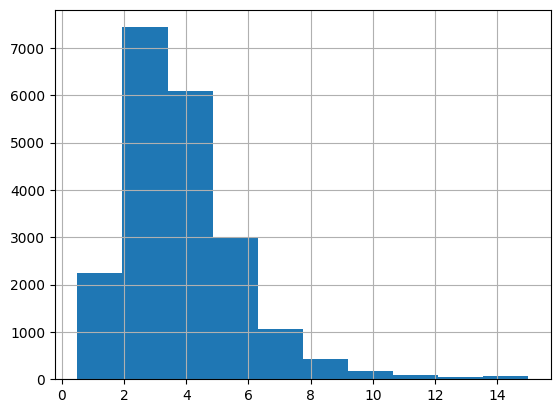

In [ ]:
# Task 1
df['MedInc'].hist()

<Axes: >

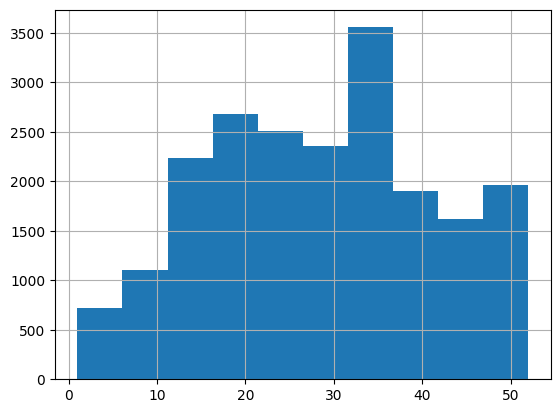

In [3]:
# Task 2
df['HouseAge'].hist()

In [5]:
import numpy as np

print(f'MedInc: {np.abs(np.median(df['MedInc']) - np.mean(df['MedInc']))}')
print(f'HouseAge: {np.abs(np.median(df['HouseAge']) - np.mean(df['HouseAge'])) / 5}')

MedInc: 0.3358710029069769
HouseAge: 0.07210271317829467


<Axes: >

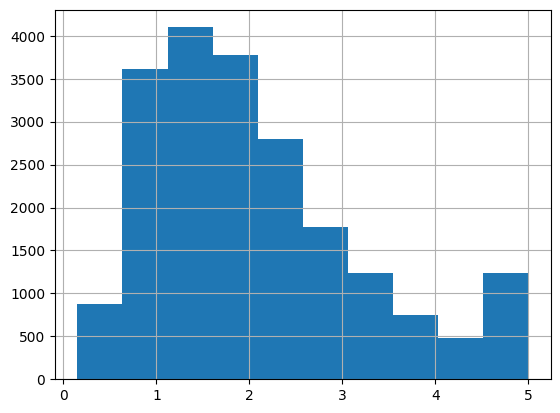

In [6]:
# Task 3
target.hist()

In [7]:
import scipy.stats

scipy.stats.iqr(target)

1.4512499999999997

In [9]:
# Task 4
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [10]:
# Task 5
df.corrwith(target, method='pearson')

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
dtype: float64

In [11]:
# Task 6
df.corrwith(target, method='spearman')

MedInc        0.676778
HouseAge      0.074855
AveRooms      0.263367
AveBedrms    -0.125187
Population    0.003839
AveOccup     -0.256594
Latitude     -0.165739
Longitude    -0.069667
dtype: float64

In [12]:
df.corrwith(target, method='kendall')

MedInc        0.495528
HouseAge      0.049822
AveRooms      0.179175
AveBedrms    -0.083489
Population    0.002172
AveOccup     -0.174370
Latitude     -0.109411
Longitude    -0.052495
dtype: float64

In [13]:
df_stand = scipy.stats.zscore(df)
df_stand.corrwith(target, method='pearson')

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
dtype: float64

In [14]:
df_stand.corrwith(target, method='spearman')

MedInc        0.676778
HouseAge      0.074855
AveRooms      0.263367
AveBedrms    -0.125187
Population    0.003839
AveOccup     -0.256594
Latitude     -0.165739
Longitude    -0.069667
dtype: float64

In [15]:
df_stand.corrwith(target, method='kendall')

MedInc        0.495528
HouseAge      0.049822
AveRooms      0.179175
AveBedrms    -0.083489
Population    0.002172
AveOccup     -0.174370
Latitude     -0.109411
Longitude    -0.052495
dtype: float64

In [20]:
# Task 7
print(scipy.stats.pearsonr(df['AveRooms'], target))
print(scipy.stats.spearmanr(df['AveRooms'], target))
print(scipy.stats.kendalltau(df['AveRooms'], target))

PearsonRResult(statistic=0.15194828974145783, pvalue=7.569242134483651e-107)
SignificanceResult(statistic=0.26336668772954447, pvalue=0.0)
SignificanceResult(statistic=0.17917481650845044, pvalue=0.0)


<Axes: >

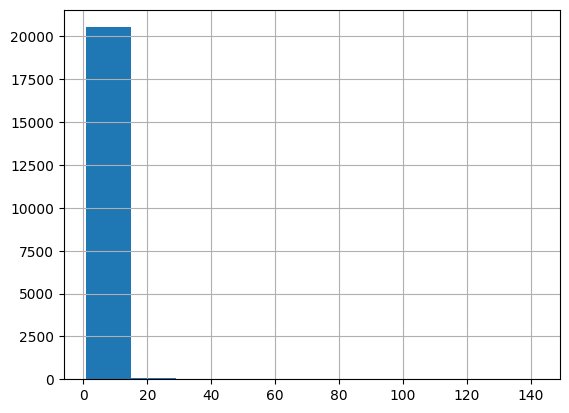

In [17]:
# Task 8
df['AveRooms'].hist()

In [21]:
# Task 9
lower_bound = np.percentile(df['AveRooms'], q=0.025)
upper_bound = np.percentile(df['AveRooms'], q=(1 - 0.025))

In [24]:
df['target'] = target

In [25]:
df_new = df[(df['AveRooms'] > lower_bound) & (df['AveRooms'] < upper_bound)]

In [27]:
df_new

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
50,0.9218,21.0,2.045662,1.034247,735.0,1.678082,37.82,-122.27,1.719
73,0.4999,46.0,1.714286,0.571429,18.0,2.571429,37.81,-122.29,0.675
83,0.8075,52.0,2.490323,1.058065,346.0,2.232258,37.81,-122.28,1.375
86,0.9770,40.0,2.315789,1.186842,582.0,1.531579,37.81,-122.27,1.188
91,0.8668,52.0,2.443182,0.988636,904.0,10.272727,37.80,-122.28,1.375
...,...,...,...,...,...,...,...,...,...
18549,2.0172,52.0,2.540984,1.000000,1054.0,3.455738,36.96,-122.02,1.125
19435,0.5360,16.0,2.111111,2.111111,166.0,18.444444,37.67,-121.04,1.625
19522,0.6825,17.0,2.372549,0.990196,198.0,0.970588,37.65,-121.00,1.875
20192,2.3750,31.0,2.545455,1.000000,326.0,3.704545,34.26,-119.21,0.550


In [29]:
print(scipy.stats.pearsonr(df_new['AveRooms'], df_new['target']))
print(scipy.stats.spearmanr(df_new['AveRooms'], df_new['target']))
print(scipy.stats.kendalltau(df_new['AveRooms'], df_new['target']))

PearsonRResult(statistic=0.02691467350801182, pvalue=0.7080598012720367)
SignificanceResult(statistic=-0.004708681299659793, pvalue=0.9477757124378108)
SignificanceResult(statistic=0.0002645306059934796, pvalue=0.9956520390482929)


<Axes: >

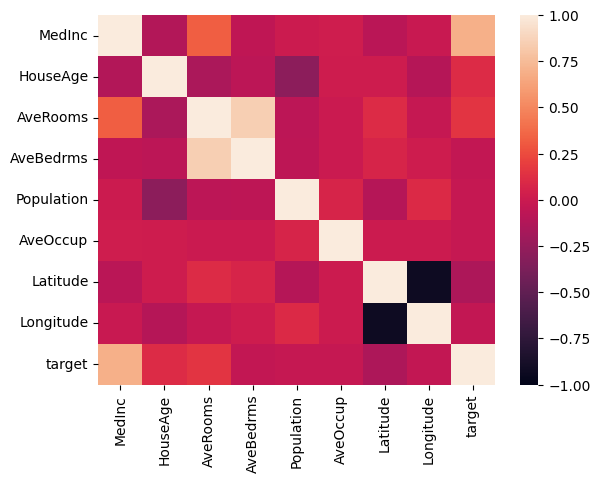

In [31]:
# Task 10
import seaborn as sns

sns.heatmap(df.corr(), vmin=-1, vmax=1)